In [1]:
from statsmodels.tsa.api import ARDL
from statsmodels.tsa.ardl import ardl_select_order
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/deseasoned_log_diff.csv')
data.head()

,idx,trade_diff,fxres_diff,exrate_diff
0,1,-0.146577,32086.381014,0.165112
1,2,0.537319,66728.047440,1.135469
2,3,-0.001491,59625.268454,0.574136
3,4,-0.075843,65695.118269,-0.389686
4,5,0.096397,6645.265046,0.161513


In [3]:
train_data = data[:100]
val_data = data[100:]

In [4]:
timestamps = pd.read_excel('../data/final-data-assgn3.xlsx')['Month']

In [5]:
optimal_order = ardl_select_order(train_data['trade_diff'], 4, train_data[['exrate_diff', 'fxres_diff']], 4, ic='aic')
optimal_order.model.ardl_order

(2, 3, 4)

In [6]:
opt_model = optimal_order.model.fit()
opt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARDL Model Results                              
==============================================================================
Dep. Variable:             trade_diff   No. Observations:                  100
Model:                  ARDL(2, 3, 4)   Log Likelihood                 -22.176
Method:               Conditional MLE   S.D. of innovations              0.303
Date:                Wed, 30 Apr 2025   AIC                             70.351
Time:                        13:02:01   BIC                            103.956
Sample:                             4   HQIC                            83.944
                                  100                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0490      0.046      1.062      0.291      -0.043       0.141
trade_diff.L1     -0.2966      0.098     -3.024      0.003      -0.492      -0.102
trade_diff.L2     -0.3737      0.102     -3.675      0.000      -0.576      -0.172
exrate_diff.L0     0.0433      0.033      1.295      0.199      -0.023       0.110
exrate_diff.L1    -0.0488      0.033     -1.483      0.142      -0.114       0.017
exrate_diff.L2    -0.0914      0.033     -2.779      0.007      -0.157      -0.026
exrate_diff.L3    -0.0954      0.034     -2.767      0.007      -0.164      -0.027
fxres_diff.L0   -1.05e-06   5.48e-07     -1.916      0.059   -2.14e-06    3.94e-08
fxres_diff.L1   8.842e-07   5.16e-07      1.714      0.090   -1.41e-07    1.91e-06
fxres_diff.L2   7.776e-07    5.3e-07      1.467      0.146   -2.76e-07    1.83e-06
fxres_diff.L3  -1.349e-06   5.47e-07     -2.466      0.016   -2.44e-06   -2.62e-07
fxres_diff.L4    9.87e-07    5.6e-07      1.762      0.082   -1.26e-07     2.1e-06
==================================================================================
"""

In [7]:
model = ARDL(train_data['trade_diff'], 4, train_data[['exrate_diff', 'fxres_diff']], 4).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARDL Model Results                              
==============================================================================
Dep. Variable:             trade_diff   No. Observations:                  100
Model:                  ARDL(4, 4, 4)   Log Likelihood                 -22.135
Method:               Conditional MLE   S.D. of innovations              0.305
Date:                Wed, 30 Apr 2025   AIC                             76.270
Time:                        13:02:01   BIC                            117.300
Sample:                             4   HQIC                            92.855
                                  100                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0442      0.048      0.921      0.360      -0.051       0.140
trade_diff.L1     -0.2582      0.110     -2.352      0.021      -0.477      -0.040
trade_diff.L2     -0.3560      0.115     -3.090      0.003      -0.585      -0.127
trade_diff.L3      0.0814      0.111      0.732      0.466      -0.140       0.303
trade_diff.L4     -0.0503      0.106     -0.474      0.637      -0.261       0.161
exrate_diff.L0     0.0429      0.034      1.246      0.216      -0.026       0.112
exrate_diff.L1    -0.0533      0.034     -1.550      0.125      -0.122       0.015
exrate_diff.L2    -0.0845      0.034     -2.463      0.016      -0.153      -0.016
exrate_diff.L3    -0.0940      0.036     -2.623      0.010      -0.165      -0.023
exrate_diff.L4     0.0103      0.036      0.282      0.778      -0.062       0.083
fxres_diff.L0  -1.037e-06   5.58e-07     -1.857      0.067   -2.15e-06    7.41e-08
fxres_diff.L1   1.062e-06   5.64e-07      1.883      0.063   -6.03e-08    2.18e-06
fxres_diff.L2   5.793e-07   5.83e-07      0.994      0.323   -5.81e-07    1.74e-06
fxres_diff.L3  -1.323e-06   5.77e-07     -2.293      0.024   -2.47e-06   -1.75e-07
fxres_diff.L4   9.992e-07   5.67e-07      1.762      0.082   -1.29e-07    2.13e-06
==================================================================================
"""

In [8]:
model_4_0_4 = ARDL(train_data['trade_diff'], 4, train_data[['exrate_diff', 'fxres_diff']], {'exrate_diff':0, 'fxres_diff':4}).fit()
model_4_0_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARDL Model Results                              
==============================================================================
Dep. Variable:             trade_diff   No. Observations:                  100
Model:                  ARDL(4, 0, 4)   Log Likelihood                 -29.690
Method:               Conditional MLE   S.D. of innovations              0.330
Date:                Wed, 30 Apr 2025   AIC                             83.381
Time:                        13:02:01   BIC                            114.153
Sample:                             4   HQIC                            95.819
                                  100                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0110      0.047     -0.237      0.813      -0.104       0.081
trade_diff.L1     -0.1986      0.106     -1.865      0.066      -0.410       0.013
trade_diff.L2     -0.3221      0.114     -2.821      0.006      -0.549      -0.095
trade_diff.L3      0.0857      0.112      0.769      0.444      -0.136       0.307
trade_diff.L4     -0.0708      0.110     -0.646      0.520      -0.289       0.147
exrate_diff.L0     0.0444      0.035      1.272      0.207      -0.025       0.114
fxres_diff.L0  -8.051e-07   5.78e-07     -1.393      0.167   -1.95e-06    3.44e-07
fxres_diff.L1   8.842e-07   5.76e-07      1.536      0.128   -2.61e-07    2.03e-06
fxres_diff.L2   3.559e-07   5.93e-07      0.601      0.550   -8.22e-07    1.53e-06
fxres_diff.L3  -1.147e-06   5.77e-07     -1.987      0.050   -2.29e-06    5.04e-10
fxres_diff.L4   1.337e-06   5.79e-07      2.310      0.023    1.86e-07    2.49e-06
==================================================================================
"""

In [9]:
opt_model_forecast = opt_model.forecast(21, val_data[['exrate_diff', 'fxres_diff']])
model_forecast = model.forecast(21, val_data[['exrate_diff', 'fxres_diff']])
model_4_0_4_forecast = model_4_0_4.forecast(21, val_data[['exrate_diff', 'fxres_diff']])

Text(0.5, 1.0, 'Forecast vs Ground Truth')

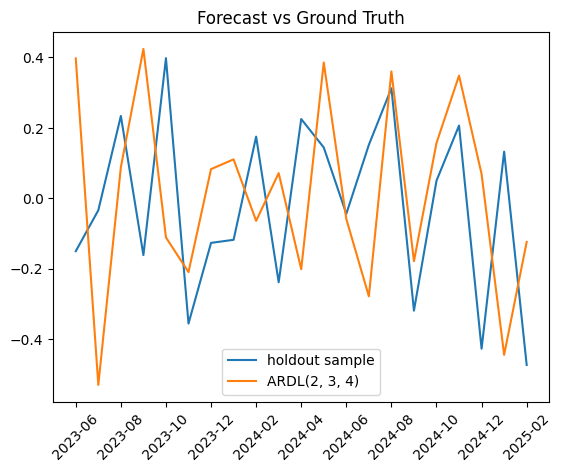

In [11]:
plt.figure()
plt.plot(timestamps[101:], val_data['trade_diff'], label = 'holdout sample')
plt.plot(timestamps[101:], opt_model_forecast, label = 'ARDL(2, 3, 4)')
plt.legend()
plt.xticks(
    ticks=range(0, len(timestamps[101:]), 2),
    rotation=45  
)
plt.title('Forecast vs Ground Truth')

In [13]:
resid = opt_model.resid
print(type(resid))
resid

<class 'pandas.core.series.Series'>


4     0.119998
5     0.034327
6    -0.068440
7     0.047192
8    -0.075356
        ...   
95   -0.192510
96   -0.292815
97    0.095208
98   -0.104257
99    0.344571
Length: 96, dtype: float64

In [14]:
resid.to_csv('../data/ardl_234_residuals.csv')